**Level 1**

In [2]:
#task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
from pathlib import Path
file_path = Path(r"C:\Users\krishna vora\OneDrive\Desktop\cognifyz task\Dataset .csv")
df = pd.read_csv(file_path, encoding="utf-8")

In [4]:
print(df.shape)

(9551, 21)


In [5]:
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
print("Columns:", df.columns)

Columns: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [7]:
col_cuisine = "Cuisines"

In [8]:
cuisine_list = df[col_cuisine].dropna().apply(lambda x: [i.strip() for i in x.split(",")])

In [9]:
from collections import Counter
cuisine_counter = Counter()
for cuisines in cuisine_list:
    cuisine_counter.update(cuisines)

In [10]:
cuisine_df = pd.DataFrame(cuisine_counter.items(), columns=["Cuisine", "Restaurant Count"])

In [11]:
top3 = cuisine_df.sort_values("Restaurant Count", ascending=False).head(3).reset_index(drop=True)


=== Top 3 Cuisines ===
        Cuisine  Restaurant Count  Percentage
0  North Indian              3960   41.461627
1       Chinese              2735   28.635745
2     Fast Food              1986   20.793634


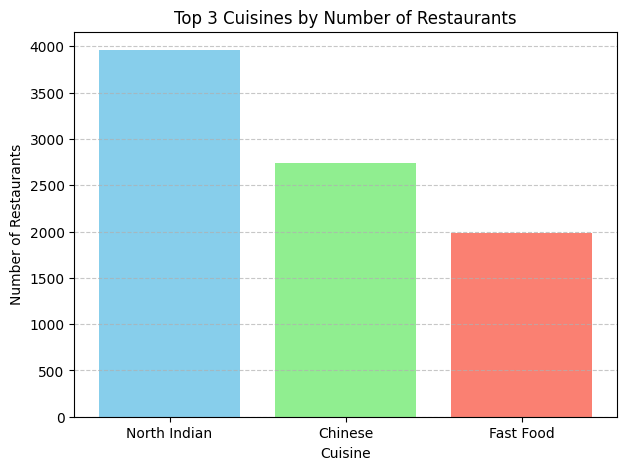

In [12]:
total_restaurants = df.shape[0]
top3["Percentage"] = (top3["Restaurant Count"] / total_restaurants) * 100
print("\n=== Top 3 Cuisines ===")
print(top3)

plt.figure(figsize=(7,5))
plt.bar(top3["Cuisine"], top3["Restaurant Count"], color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Top 3 Cuisines by Number of Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
#task 2
import pandas as pd
import matplotlib.pyplot as plt
import os
from typing import Optional

In [14]:
col_city = "City"
col_rating = "Aggregate rating"

city_counts = df[col_city].value_counts()
top_city = city_counts.idxmax()
top_city_count = city_counts.max()
print(f"\nCity with the highest number of restaurants: {top_city} ({top_city_count} restaurants)")


City with the highest number of restaurants: New Delhi (5473 restaurants)


In [15]:
avg_rating_by_city = df.groupby(col_city)[col_rating].mean().sort_values(ascending=False)

In [16]:
top_avg_city = avg_rating_by_city.idxmax()
top_avg_rating = avg_rating_by_city.max()
print(f"\nCity with the highest average rating: {top_avg_city} ({top_avg_rating:.2f})")


City with the highest average rating: Inner City (4.90)


In [17]:
print("\nTop 10 cities by number of restaurants:")
print(city_counts.head(10))

print("\nTop 10 cities by average rating:")
print(avg_rating_by_city.head(10))



Top 10 cities by number of restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64

Top 10 cities by average rating:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64


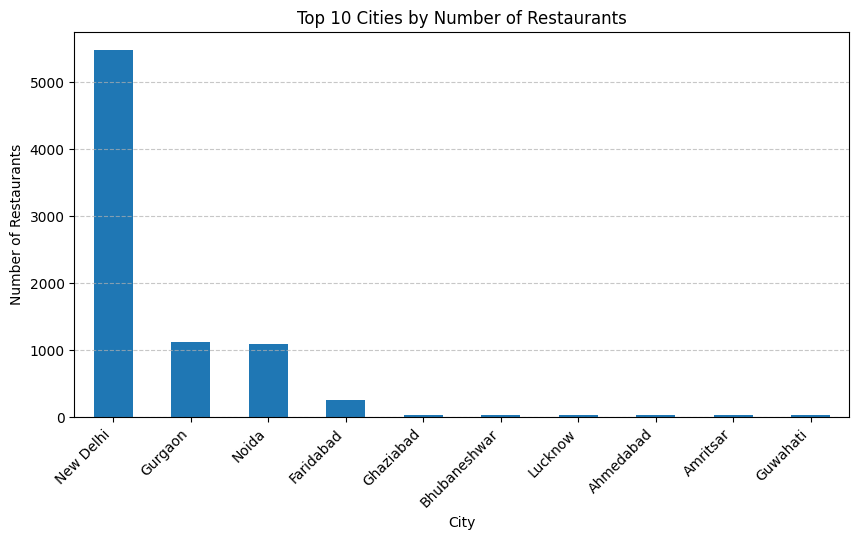

In [18]:
plt.figure(figsize=(10,5))
city_counts.head(10).plot(kind='bar')
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

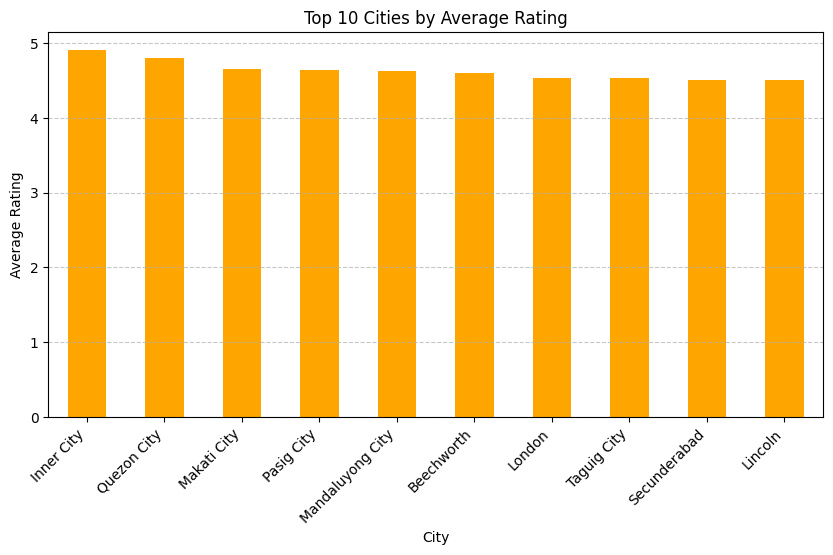

In [19]:
plt.figure(figsize=(10,5))
avg_rating_by_city.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
#task 3
print("Columns:", df.columns)
print("\nUnique values in 'Price range':")
print(df["Price range"].unique())


Columns: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Unique values in 'Price range':
[3 4 2 1]


In [21]:
price_counts = df["Price range"].value_counts().sort_index()

In [22]:
price_percent = (price_counts / price_counts.sum()) * 100


Percentage of restaurants in each price range:
Price Range 1: 46.53%
Price Range 2: 32.59%
Price Range 3: 14.74%
Price Range 4: 6.14%


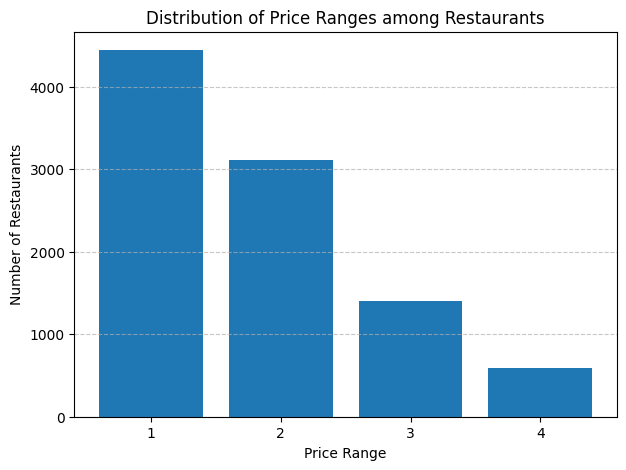

In [23]:
print("\nPercentage of restaurants in each price range:")
for pr, pct in price_percent.items():
    print(f"Price Range {pr}: {pct:.2f}%")

# Step 6: Create bar chart
plt.figure(figsize=(7, 5))
plt.bar(price_counts.index.astype(str), price_counts.values)
plt.title("Distribution of Price Ranges among Restaurants")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
#task 4
print("Columns:", df.columns)

Columns: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [25]:
col_online = "Has Online delivery"
col_rating = "Aggregate rating"


In [26]:
online_counts = df[col_online].value_counts()

# Normalize to percentages
online_percent = df[col_online].value_counts(normalize=True) * 100

In [27]:
print("\n=== Percentage of Restaurants Offering Online Delivery ===")
for status, pct in online_percent.items():
    print(f"{status}: {pct:.2f}%")


=== Percentage of Restaurants Offering Online Delivery ===
No: 74.34%
Yes: 25.66%


In [28]:
avg_rating_online = df.groupby(col_online)[col_rating].mean()

print("\n=== Average Ratings by Online Delivery Status ===")
print(avg_rating_online)


=== Average Ratings by Online Delivery Status ===
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


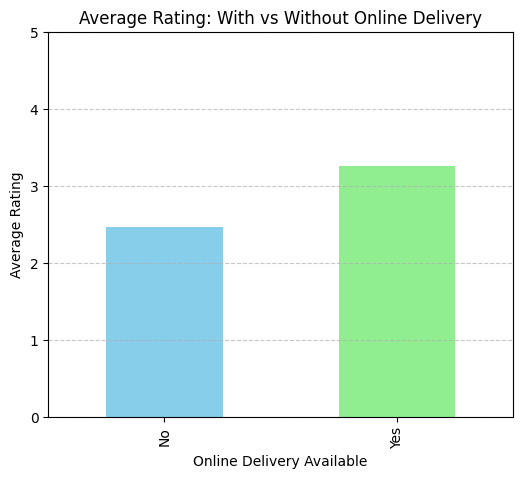

In [29]:
plt.figure(figsize=(6, 5))
avg_rating_online.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Average Rating: With vs Without Online Delivery")
plt.xlabel("Online Delivery Available")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Level 2**